<a href="https://colab.research.google.com/github/rohithp29/Data-Science-Project/blob/main/Task_7_Dimensionality_Reduction_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dimensionality Reduction

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [ ]:
iris=load_iris()
x=iris.data
y=iris.target

In [ ]:
pca=PCA(n_components=2)
x_pca=pca.fit_transform(x)

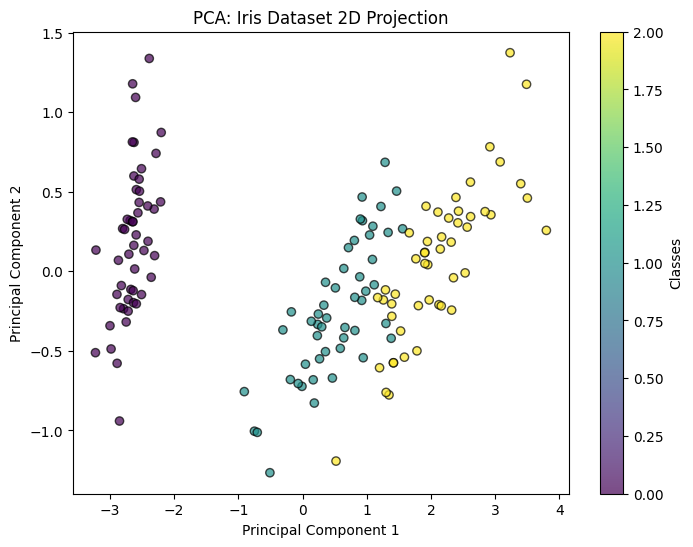

In [ ]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, cmap='viridis', edgecolor='k', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA: Iris Dataset 2D Projection")
plt.colorbar(label="Classes")
plt.show()

Stock Price Prediction Using Time Series Forecasting

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [2]:
df = pd.read_csv("/content/AAPL_data.csv")

In [3]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

In [4]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.drop(['Name'], axis=1, inplace=True)
df.sort_index(inplace=True)


In [5]:
df.fillna(method='ffill', inplace=True)

<ipython-input-5-e9443599d05e>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


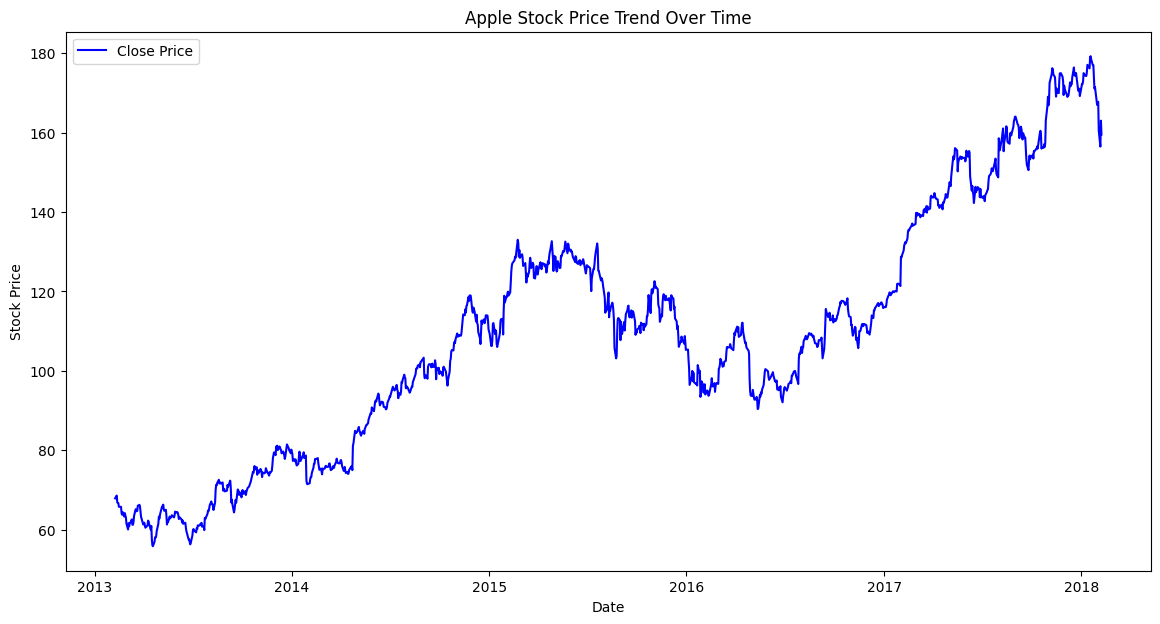

In [6]:
plt.figure(figsize=(14, 7))
plt.plot(df['close'], label="Close Price", color='blue')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Apple Stock Price Trend Over Time")
plt.legend()
plt.show()


In [7]:
auto_model = auto_arima(df['close'], seasonal=False, trace=True, suppress_warnings=True)
p, d, q = auto_model.order
model = ARIMA(df['close'], order=(p, d, q))
model_fit = model.fit()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=7.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4716.112, Time=0.11 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4717.820, Time=0.19 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4717.799, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4716.804, Time=0.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4718.052, Time=4.77 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 12.984 seconds


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


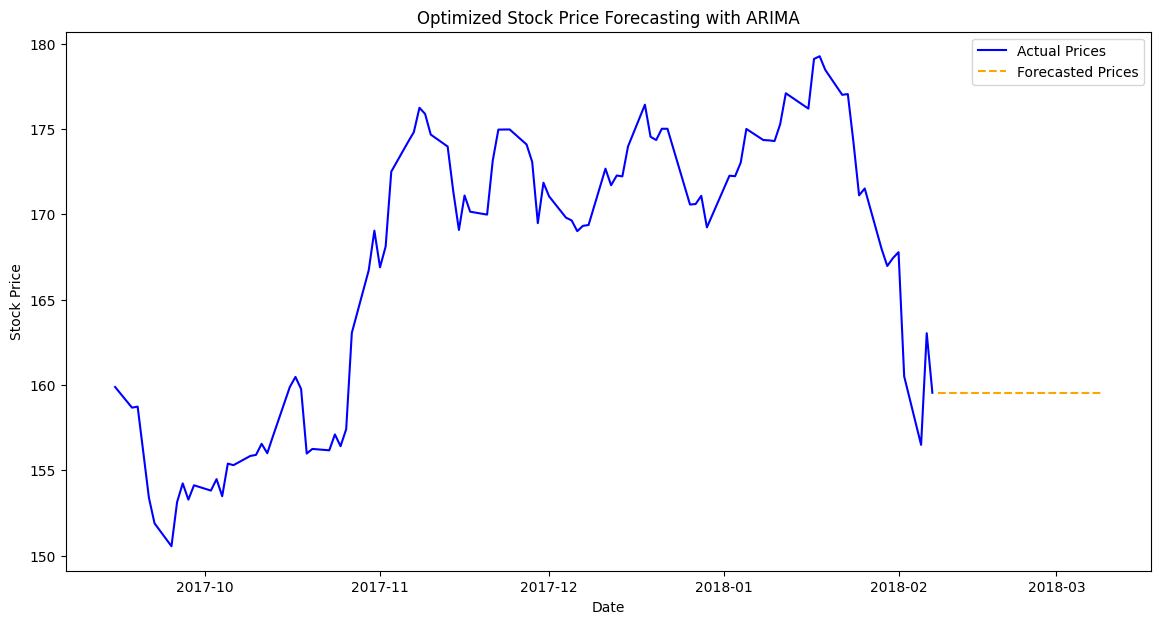

In [8]:
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)
forecast_dates = pd.date_range(df.index[-1], periods=forecast_steps + 1, freq='D')[1:]
plt.figure(figsize=(14, 7))
plt.plot(df.index[-100:], df['close'][-100:], label="Actual Prices", color='blue')
plt.plot(forecast_dates, forecast, label="Forecasted Prices", linestyle='dashed', color='orange')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Optimized Stock Price Forecasting with ARIMA")
plt.legend()
plt.show()

In [9]:
actual = df['close'].iloc[-forecast_steps:].values
if len(actual) < forecast_steps:
    actual = np.pad(actual, (forecast_steps - len(actual), 0), mode='edge')
mae = mean_absolute_error(actual, forecast)
rmse = np.sqrt(mean_squared_error(actual, forecast))
print(f"Optimal ARIMA Parameters: (p={p}, d={d}, q={q})")
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")



Optimal ARIMA Parameters: (p=0, d=1, q=0)
MAE: 12.09, RMSE: 13.19
